In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

In [2]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
(len(X_test_0)),(len(X_train_0))

(10000, 60000)

In [3]:
(X_train_0,y_train_0),(X_test_0,y_test_0) = mnist.load_data()
print("Shape of training data set: ", X_train_0.shape, y_train_0.shape)
print()
print("Shape of testing data set: ", X_test_0.shape, y_test_0.shape)
print()
print("Ratio of test size: ", round((len(X_test_0) / len(X_train_0)),2))



Shape of training data set:  (60000, 28, 28) (60000,)

Shape of testing data set:  (10000, 28, 28) (10000,)

Ratio of test size:  0.17


In [8]:
number_of_features = X_train_0[0].shape[0] * X_train_0[0].shape[1]  ##one sheet of 6000 sheets has shape of 28*28, so each time we pass 28*28 values at once to the nodes an drepeat this for 6000 times
unique_labels = len(np.unique(y_train_0))
print(number_of_features,",", unique_labels)

784 , 10


#### Unique labels(dependent variable) for dataset

In [11]:
len(np.unique(y_train_0))

10

In [12]:
np.unique(y_train_0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

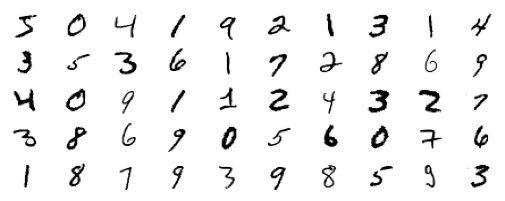

In [72]:
import matplotlib.pyplot as plt
for i in range(50):
    ax = plt.subplot(10,10,i+1)
    ax.axis('off')
    plt.imshow(X_train_0[i], cmap='Greys')

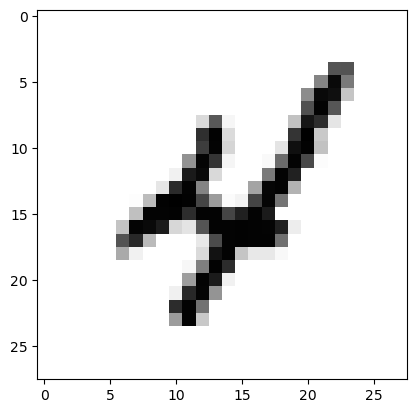

In [25]:
plt.imshow(X_train_0[9], cmap='Greys')

In [26]:
y_train_0[9]

4

In [16]:
X_train_0[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### Problems With This Data
There are (at least) two problems with this data as it is currently formatted:

1. The input data is formatted as a 2D array, but our deep neural network needs to data as a 1D vector.
This is because of how deep neural networks are constructed, it is simply not possible to send anything but a vector as input.
These vectors can be/represent anything, but from the computer's perspective they must be a 1D vector.
2. Our labels are numbers, but we're not performing regression. We need to use a 1-hot vector encoding for our labels.

3. This is important because if we use the number values we would be training our network to think of these values as continuous.
a. If the digit is supposed to be a 2, guessing 1 and guessing 9 are both equally wrong.
    Training the network with numbers would imply that a prediction of 1 would be "less wrong" than a prediction of 9, when in fact both are equally wrong.

In [31]:
print("Before reshape, the shape of training images: ", X_train_0.shape)


Before reshape, the shape of training images:  (60000, 28, 28)


##### RESHAPING INDEPENDENT VARIABLES IN TRAIN AND TEST DATASET

In [33]:
# In the images, there are 6000 of 28x28 matrices, now in order to change it to vector, we will make 28x28 matrix to a single vector of (28*28) rows
X_train = X_train_0.reshape(len(X_train_0), number_of_features)
X_test = X_test_0.reshape(len(X_test_0), number_of_features)
print()
print("After reshape, the shape of training images: ", X_train.shape)
print("After reshape, the shape of test images: ", X_test.shape)


After reshape, the shape of training images:  (60000, 784)
After reshape, the shape of test images:  (10000, 784)


##### ONE-HOT encoding DEPENDENT VARIABLES (or Labels) in TRAIN and TEST DATASET

In [34]:
y_train = keras.utils.to_categorical(y_train_0, num_classes = unique_labels )
y_test = keras.utils.to_categorical(y_test_0, num_classes = unique_labels )

In [38]:
y_train_0[0]

5

In [39]:
np.unique(y_train_0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [47]:
y_train[0]  ##This means first value in y_train was 5 since "1" occurs at 6th position

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

##### Neural Network
This neural network will have three layers; input layer, hidden layer, output layer. This data has 784 columns or features, hence input layer will have 784 features, and there are 10 possible unique outputs, hence will have 10 nodes at the output. The hidden layer number of neurons is our choice, for a start, we will choose 30 neurons in hidden layer.

In [48]:
# Libraries for neural network creation.
# sequence is required to create a series of layers
# for adding hidden layers, we need Dense
from keras.models import Sequential
from keras.layers import Dense

In [55]:
model = Sequential()

In [56]:
# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
model.add(Dense(units = 30, ##Hidden layer will have 30 nodes
               activation = 'sigmoid',
               input_shape=(number_of_features,)))

In [65]:
0+784*30+30  #initial param+nodes in layer*no. of o/p nodes+no. of o/p nodes = Total params

23550

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                23550     
                                                                 
Total params: 23,550
Trainable params: 23,550
Non-trainable params: 0
_________________________________________________________________


In [59]:
#i/p layer has 784 nodes, then hidden layer has 30 nodes,

In [60]:
#Adding o/p layer, it shoul dhave number of unique labels as nodes
model.add(Dense(units = unique_labels,
               activation='softmax'))

In [64]:
23550+30*10+10 #initial param+nodes in layer*no. of o/p nodes+no. of o/p nodes = Total Params

23860

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                23550     
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [67]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

###### Compiling and Training a Model¶
Our model must be compiled and trained before it can make useful predictions. Models are trainined with the training data and training labels. During this process Keras will use an optimizer, loss function, metrics of our chosing to repeatedly make predictions and recieve corrections. The loss function is used to train the model, the metrics are only used for human evaluation of the model during and after training.

Training happens in a series of epochs which are divided into a series of rounds. Each round the network will recieve batch_size samples from the training data, make predictions, and recieve one correction based on the errors in those predictions. In a single epoch, the model will look at every item in the training set exactly once, which means individual data points are sampled from the training data without replacement during each round of each epoch.

During training, the training data itself will be broken into two parts according to the validation_split parameter. The proportion that you specify will be left out of the training process, and used to evaluate the accuracy of the model. This is done to preserve the test data, while still having a set of data left out in order to test against — and hopefully prevent — overfitting. At the end of each epoch, predictions will be made for all the items in the validation set, but those predictions won't adjust the weights in the model. Instead, if the accuracy of the predictions in the validation set stops improving then training will stop early, even if accuracy in the training set is improving.

In [68]:
# categorical_crossentropy is a common loss function used for categorical classification. - It penalizes for going away from actual prob and as e keep coming close to actual category i.e. predicted prob of actual class keeps going down, loss fn increases and vice versa
# accuracy is the percent of predictions that were correct.
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                23550     
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = model.fit(x = X_train,
                    y = y_train,
                    verbose=2,
                    batch_size=100, # In each epoch, total train size/batch_size rounds happen
                   epochs=10,   # 1 epoch means whole training data passed to model
                   validation_split=0.10)

Epoch 1/10
540/540 - 2s - loss: 1.4733 - accuracy: 0.6292 - val_loss: 0.9941 - val_accuracy: 0.8275 - 2s/epoch - 3ms/step
Epoch 2/10
540/540 - 1s - loss: 0.8785 - accuracy: 0.8217 - val_loss: 0.6867 - val_accuracy: 0.8712 - 817ms/epoch - 2ms/step
Epoch 3/10
540/540 - 1s - loss: 0.6771 - accuracy: 0.8542 - val_loss: 0.5524 - val_accuracy: 0.8910 - 910ms/epoch - 2ms/step
Epoch 4/10
540/540 - 1s - loss: 0.5742 - accuracy: 0.8713 - val_loss: 0.4875 - val_accuracy: 0.8918 - 874ms/epoch - 2ms/step
Epoch 5/10
540/540 - 1s - loss: 0.5120 - accuracy: 0.8800 - val_loss: 0.4288 - val_accuracy: 0.9062 - 917ms/epoch - 2ms/step
Epoch 6/10
540/540 - 1s - loss: 0.4697 - accuracy: 0.8879 - val_loss: 0.3918 - val_accuracy: 0.9085 - 909ms/epoch - 2ms/step
Epoch 7/10
540/540 - 1s - loss: 0.4399 - accuracy: 0.8910 - val_loss: 0.3706 - val_accuracy: 0.9118 - 892ms/epoch - 2ms/step
Epoch 8/10
540/540 - 1s - loss: 0.4216 - accuracy: 0.8934 - val_loss: 0.3599 - val_accuracy: 0.9145 - 901ms/epoch - 2ms/step
Epo

#### Visualizing our performance

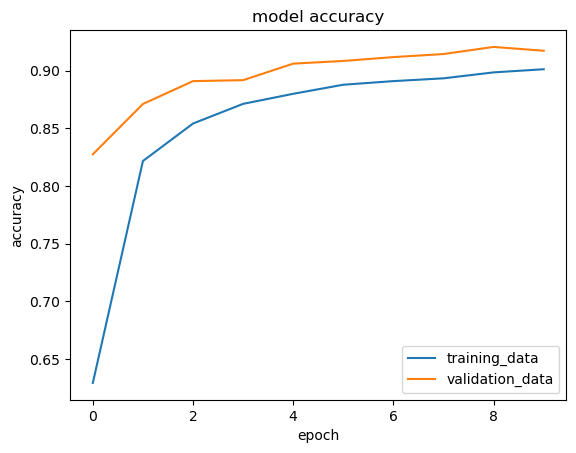

In [79]:
#Visualizing accuracy changes
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training_data', 'validation_data'], loc='best')

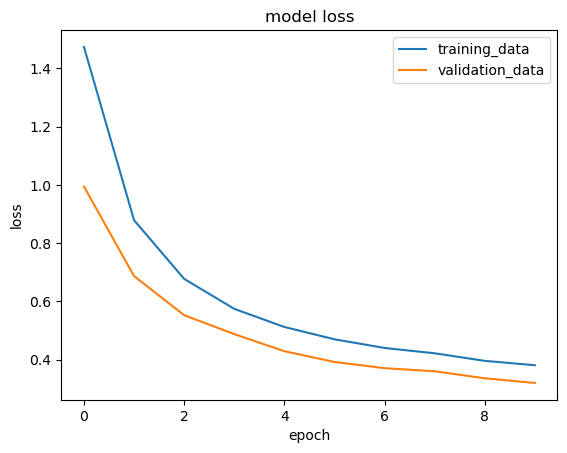

In [80]:
#Visualizing loss changes
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training_data', 'validation_data'], loc='best')

In [ ]:
#We see that a loss of 0.3806 is achieved but how to know its min or not, first lets validate on test data and then we will think to optimize our model further

In [74]:
loss, accuracy = model.evaluate(x = X_test,
                                y = y_test )
print()
print("Testing data loss value: ", round(loss, 2))
print()
print('Testing data accuracy: ', round(accuracy, 2))

313/313 [==============================] - 0s 1ms/step - loss: 0.3630 - accuracy: 0.9060

Testing data loss value:  0.36

Testing data accuracy:  0.91


## Optimizing a model:
1. Changing number of epochs
2. Changing the optimizer
3. Changing the learning rate for the optimizer:
    a. Using automatic decay methods
    b. Manually changing
4. Changing the model

### 1. Changing the epochs while keeping untrained model

In [116]:
model=Sequential()
model.add(Dense(units = 30, ##Hidden layer will have 30 nodes
               activation = 'sigmoid',
               input_shape=(number_of_features,)))
model.add(Dense(units = unique_labels,
               activation='softmax')) ##o/p layer so units(or nodes)= no. of o/p labels or unique categories in o/p
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                23550     
                                                                 
 dense_7 (Dense)             (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [118]:
#Changing the number of epochs
history_2 = model.fit(x = X_train,
                    y = y_train,
                    verbose=2,
                    batch_size=100, # In each epoch, total train size/batch_size rounds happen
                   epochs=30,   # 1 epoch means whole training data passed to model
                   validation_split=0.10)

Epoch 1/30
540/540 - 2s - loss: 1.3968 - accuracy: 0.6484 - val_loss: 0.9178 - val_accuracy: 0.8438 - 2s/epoch - 3ms/step
Epoch 2/30
540/540 - 1s - loss: 0.8287 - accuracy: 0.8329 - val_loss: 0.6577 - val_accuracy: 0.8793 - 971ms/epoch - 2ms/step
Epoch 3/30
540/540 - 1s - loss: 0.6470 - accuracy: 0.8624 - val_loss: 0.5233 - val_accuracy: 0.8958 - 975ms/epoch - 2ms/step
Epoch 4/30
540/540 - 1s - loss: 0.5541 - accuracy: 0.8755 - val_loss: 0.4664 - val_accuracy: 0.9040 - 777ms/epoch - 1ms/step
Epoch 5/30
540/540 - 1s - loss: 0.4958 - accuracy: 0.8834 - val_loss: 0.4179 - val_accuracy: 0.9117 - 743ms/epoch - 1ms/step
Epoch 6/30
540/540 - 1s - loss: 0.4576 - accuracy: 0.8893 - val_loss: 0.3990 - val_accuracy: 0.9070 - 956ms/epoch - 2ms/step
Epoch 7/30
540/540 - 1s - loss: 0.4312 - accuracy: 0.8922 - val_loss: 0.3654 - val_accuracy: 0.9133 - 777ms/epoch - 1ms/step
Epoch 8/30
540/540 - 1s - loss: 0.4096 - accuracy: 0.8945 - val_loss: 0.3518 - val_accuracy: 0.9158 - 750ms/epoch - 1ms/step
Epo

Text(0, 0.5, 'loss')

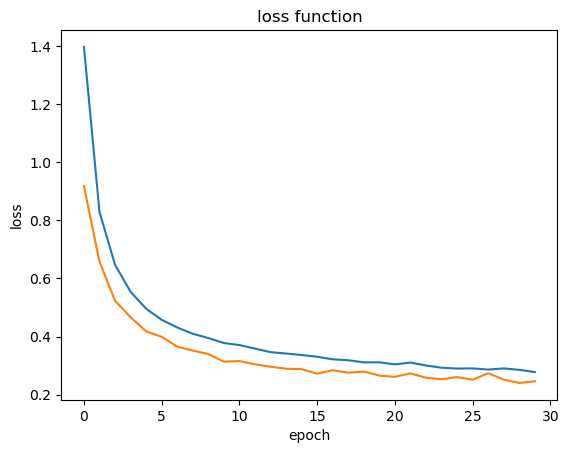

In [119]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title("loss function")
plt.xlabel("epoch")
plt.ylabel("loss")

In [101]:
predictions_new_model=model.predict(X_test)

313/313 [==============================] - 0s 653us/step


In [102]:
len(predictions_new_model)

10000

In [103]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [105]:
predictions_new_model[0]

array([6.8366615e-05, 2.9688394e-05, 7.7979569e-03, 1.7467178e-02,
       5.7664060e-06, 1.4017300e-04, 2.2269544e-06, 9.7420007e-01,
       2.4047612e-04, 4.7955436e-05], dtype=float32)

In [120]:
loss, accuracy = model.evaluate(X_test,y_test)
print("test_loss :",loss)
print("test_accuracy :", accuracy)

313/313 [==============================] - 0s 902us/step - loss: 0.2851 - accuracy: 0.9199
test_loss : 0.2850603759288788
test_accuracy : 0.9199000000953674


### How to use our trained model on random data

In [123]:
##Saving our model
model.save("Identify_number_model.h5")

In [139]:
##Loading our model
Identify_number_model=keras.models.load_model("Identify_number_model.h5")

In [166]:
import tensorflow as tf

In [182]:
batch_size = 50
img_height = 28
img_width = 28

In [183]:

img = tf.keras.utils.load_img(
    'test_image_2.png', target_size=(img_height, img_width)
)


In [184]:
img

In [185]:
img_array = tf.keras.utils.img_to_array(img)
#img_array = tf.expand_dims(img_array,) - to add dimension if needed

In [175]:
img_array=img_array[0]

In [186]:
img_array.shape

(3, 28, 28)

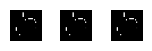

In [189]:
for i in range(3):
    ax = plt.subplot(10,10,i+1)
    ax.axis('off')
    plt.imshow(img_array[i], cmap='Greys')

In [168]:
img_array.shape

(3, 32, 32)

In [190]:
Identify_number_model.predict(img_array)

ValueError: in user code:

    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28)


In [ ]:
##so, 2-D image cant be fed as i/p, hence reshaping

In [191]:
len(img_array)

3

In [192]:
img_array = img_array.reshape(len(img_array), number_of_features)


In [193]:
img_array.shape

(3, 784)

In [195]:
my_pred=Identify_number_model.predict(img_array)

1/1 [==============================] - 0s 20ms/step


In [208]:
my_pred

array([[2.1415554e-02, 6.4740976e-04, 8.2098119e-02, 7.6635492e-01,
        2.8424861e-04, 6.3617542e-02, 2.8860103e-02, 1.9138858e-02,
        1.1457296e-02, 6.1260518e-03],
       [2.1415554e-02, 6.4740976e-04, 8.2098119e-02, 7.6635492e-01,
        2.8424861e-04, 6.3617542e-02, 2.8860103e-02, 1.9138858e-02,
        1.1457296e-02, 6.1260518e-03],
       [2.1415554e-02, 6.4740976e-04, 8.2098119e-02, 7.6635492e-01,
        2.8424861e-04, 6.3617542e-02, 2.8860103e-02, 1.9138858e-02,
        1.1457296e-02, 6.1260518e-03]], dtype=float32)

In [ ]:
## probabilities of being in the class [0,1,2,3,4,5,6,7,8,9] = 214,6.47,820,7663,2.84,636,288,191,114,61.2 
### So, as per this, the number in image 1 is 3, although it was 5 so, it could be test image unclarity or something
## or the model needs to be refined or something

In [205]:
img_array_actual_res=np.array([[0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,1,0,0,0,0]])

In [206]:
img_array_actual_res

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [202]:
#Lets check how model did on actual real life image shared by us

In [211]:
Identify_number_model.evaluate(img_array,img_array_actual_res)

1/1 [==============================] - 0s 31ms/step - loss: 2.7549 - accuracy: 0.0000e+00


[2.754866361618042, 0.0]

In [ ]:
##so, we got loss of 2.75 but accuracy 0